 # Data Pre Processing

# 1 - Handling Missing Values
    a. check the threshold value (25% or more) - we have to remove that particular feature
    b. if data is missing (< 25%)
        i.We have to check what variable it is - 
        # Char - We ahve to use "MODE"
        #Numeric - "Mean" or "Median"
            Mean -----> there is no Outlier
            Median -----> there is  Outlier

# 2 - Handling Outlier
    a.Remove - We have to take consent from Stake holder
    b. Transformation approach to treat outliers
    i.Boxplots & Whiskers
    ii.Square root a/ cube root / log
    iii. Regularisation concept - L1 & L2(Ridge & Lasso)


# 3 - Encoding concept
    a.Convert char to numeric (from 0 to so on )
    b.Convert into One Hot Encoding
    c. Create Dummy variable

# 4 - Feature Scaling
    a.Standardization- 
        #it gives positive & negative value (-3 to +3)
        #it works column wise
        #mainly used when there is an "OUTLIER"
    b.Normalization-
        #it gives positive & negative value (0 to 1)
        #it used when there is no outlier
    c.Min-Max Scaler
        #Used for image data
        
        
# 5 - Check Imbalanced dataset
        #It is only applicable with Classification Problem only
        

In [6]:
import os 
os.getcwd()

'C:\\Users\\sarwa\\OneDrive\\Desktop\\EDA CONTENT NEW'

In [7]:
# import important libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [8]:
dataset = pd.read_excel('Employee_Data.xls')
dataset

,Employee Id,First Name,Last Name,Department,Age,Experience,Salary
0,1,Joy,Bass,Sales and Marketing,28.0,3.0,32889
1,2,Sheila,Garza,Sales and Marketing,22.0,1.0,15944
2,3,John,Bryant,Customer Relations,22.0,1.0,40343
3,4,Christian,Farley,Customer Relations,22.0,1.0,19018
4,5,Colorado,Bowen,Accounting,27.0,0.0,24795
...,...,...,...,...,...,...,...
95,96,Tyrone,Barber,Sales and Marketing,47.0,22.0,79077
96,97,Urielle,Herrera,Sales and Marketing,46.0,20.0,81187
97,98,Brendan,Solis,Customer Relations,44.0,18.0,83847
98,99,Holmes,Nelson,Customer Relations,47.0,22.0,89158


In [9]:
# Q : How many data points and features we have ?
dataset.shape

(100, 7)

In [10]:
# Q : What are the column names given in our dataset?
dataset.columns

Index(['Employee Id', 'First Name', 'Last Name', 'Department', 'Age',
       'Experience', 'Salary'],
      dtype='object')

In [11]:
#Q : what are the missing values
dataset.isnull()

,Employee Id,First Name,Last Name,Department,Age,Experience,Salary
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
95,False,False,False,False,False,False,False
96,False,False,False,False,False,False,False
97,False,False,False,False,False,False,False
98,False,False,False,False,False,False,False


In [12]:
# Null values present in particular column or not
dataset.isnull().any()

Employee Id    False
First Name     False
Last Name      False
Department      True
Age             True
Experience      True
Salary         False
dtype: bool

In [13]:
#Q : what is the count of the missing values ?
dataset.isnull().sum()

Employee Id     0
First Name      0
Last Name       0
Department     19
Age            18
Experience     10
Salary          0
dtype: int64

In [14]:
# Q : How to identify datatype for the missing variable ?
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Employee Id  100 non-null    int64  
 1   First Name   100 non-null    object 
 2   Last Name    100 non-null    object 
 3   Department   81 non-null     object 
 4   Age          82 non-null     float64
 5   Experience   90 non-null     float64
 6   Salary       100 non-null    int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 5.6+ KB


In [15]:
# 3   Department   81 non-null     object
# 4   Age          82 non-null     float64
# 5   Experience   90 non-null     float64


In [16]:
print(100-81)
dept = (19/100) # calculating the percentage of null values
dept

19


0.19

In [17]:
#How many data points are given in the class "Department" ?
dataset["Department"].value_counts()
# Use mode - Most frequent occurances

Sales and Marketing    30
Accounting             27
Customer Relations     24
Name: Department, dtype: int64

In [18]:
# Info of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Employee Id  100 non-null    int64  
 1   First Name   100 non-null    object 
 2   Last Name    100 non-null    object 
 3   Department   81 non-null     object 
 4   Age          82 non-null     float64
 5   Experience   90 non-null     float64
 6   Salary       100 non-null    int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 5.6+ KB


In [19]:
dataset.head()

,Employee Id,First Name,Last Name,Department,Age,Experience,Salary
0,1,Joy,Bass,Sales and Marketing,28.0,3.0,32889
1,2,Sheila,Garza,Sales and Marketing,22.0,1.0,15944
2,3,John,Bryant,Customer Relations,22.0,1.0,40343
3,4,Christian,Farley,Customer Relations,22.0,1.0,19018
4,5,Colorado,Bowen,Accounting,27.0,0.0,24795


In [20]:
# splitting the data into Independent and Dependent variables


In [21]:
#Independent
x = dataset.iloc[:,3:6].values
x

array([['Sales and Marketing', 28.0, 3.0],
       ['Sales and Marketing', 22.0, 1.0],
       ['Customer Relations', 22.0, 1.0],
       ['Customer Relations', 22.0, 1.0],
       ['Accounting', 27.0, 0.0],
       ['Accounting', 26.0, 5.0],
       ['Customer Relations', 24.0, 6.0],
       ['Customer Relations', 29.0, 2.0],
       ['Sales and Marketing', 29.0, 5.0],
       ['Customer Relations', 30.0, 6.0],
       ['Accounting', 26.0, 5.0],
       ['Sales and Marketing', 26.0, 6.0],
       ['Accounting', 24.0, 5.0],
       ['Accounting', 22.0, 2.0],
       ['Sales and Marketing', 25.0, 3.0],
       ['Accounting', 25.0, nan],
       ['Customer Relations', 22.0, nan],
       ['Accounting', 25.0, nan],
       ['Accounting', 27.0, nan],
       [nan, 25.0, nan],
       [nan, 22.0, nan],
       [nan, 22.0, nan],
       [nan, 24.0, nan],
       [nan, 27.0, nan],
       [nan, 22.0, nan],
       [nan, 33.0, 13.0],
       [nan, 36.0, 7.0],
       [nan, 35.0, 10.0],
       [nan, 33.0, 12.0],
       [

In [22]:
#Dependent
y = dataset.iloc[:,:-1]
y.values

array([[1, 'Joy', 'Bass', 'Sales and Marketing', 28.0, 3.0],
       [2, 'Sheila', 'Garza', 'Sales and Marketing', 22.0, 1.0],
       [3, 'John', 'Bryant', 'Customer Relations', 22.0, 1.0],
       [4, 'Christian', 'Farley', 'Customer Relations', 22.0, 1.0],
       [5, 'Colorado', 'Bowen', 'Accounting', 27.0, 0.0],
       [6, 'Elijah', 'Matthews', 'Accounting', 26.0, 5.0],
       [7, 'Bo', 'Mcleod', 'Customer Relations', 24.0, 6.0],
       [8, 'Zena', 'Melendez', 'Customer Relations', 29.0, 2.0],
       [9, 'Tucker', 'Michael', 'Sales and Marketing', 29.0, 5.0],
       [10, 'Lucas', 'Rowe', 'Customer Relations', 30.0, 6.0],
       [11, 'Mallory', 'Walker', 'Accounting', 26.0, 5.0],
       [12, 'Wanda', 'Wagner', 'Sales and Marketing', 26.0, 6.0],
       [13, 'Bethany', 'Nolan', 'Accounting', 24.0, 5.0],
       [14, 'Martena', 'Harrell', 'Accounting', 22.0, 2.0],
       [15, 'Lewis', 'Carlson', 'Sales and Marketing', 25.0, 3.0],
       [16, 'Pearl', 'Pruitt', 'Accounting', 25.0, nan],
   

In [23]:
y

,Employee Id,First Name,Last Name,Department,Age,Experience
0,1,Joy,Bass,Sales and Marketing,28.0,3.0
1,2,Sheila,Garza,Sales and Marketing,22.0,1.0
2,3,John,Bryant,Customer Relations,22.0,1.0
3,4,Christian,Farley,Customer Relations,22.0,1.0
4,5,Colorado,Bowen,Accounting,27.0,0.0
...,...,...,...,...,...,...
95,96,Tyrone,Barber,Sales and Marketing,47.0,22.0
96,97,Urielle,Herrera,Sales and Marketing,46.0,20.0
97,98,Brendan,Solis,Customer Relations,44.0,18.0
98,99,Holmes,Nelson,Customer Relations,47.0,22.0


In [24]:
# Handling missing values - Manual Approach

In [25]:
dataset['Department'] = dataset["Department"].fillna("Sales and Marketing")

In [26]:
dataset["Department"].value_counts()

Sales and Marketing    49
Accounting             27
Customer Relations     24
Name: Department, dtype: int64

In [27]:
#Checking the filled null values
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Employee Id  100 non-null    int64  
 1   First Name   100 non-null    object 
 2   Last Name    100 non-null    object 
 3   Department   100 non-null    object 
 4   Age          82 non-null     float64
 5   Experience   90 non-null     float64
 6   Salary       100 non-null    int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 5.6+ KB


In [28]:
pd.DataFrame(x).head()

,0,1,2
0,Sales and Marketing,28.0,3.0
1,Sales and Marketing,22.0,1.0
2,Customer Relations,22.0,1.0
3,Customer Relations,22.0,1.0
4,Accounting,27.0,0.0


In [29]:
# Handling Missing data with Imputers
# _------> Char
# 1 and 2 ---> numeric variable
# Targeting - Char variable
from sklearn.impute import SimpleImputer
impute = SimpleImputer(strategy="most_frequent") # strategy="mean" , strategy="median"
x[:,0:1] = impute.fit_transform(x[:,0:1])

In [30]:
pd.DataFrame(x).isnull().sum()

0     0
1    18
2    10
dtype: int64

<AxesSubplot:ylabel='Age'>

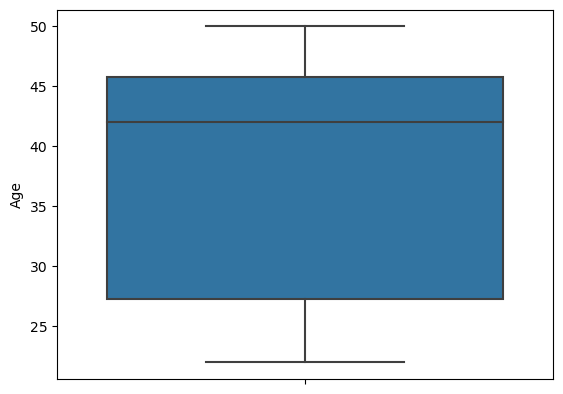

In [31]:
# Checking for the Outlier and then decide mean/median/mode approach
sns.boxplot(y="Age" , data=dataset)

<AxesSubplot:xlabel='Experience'>

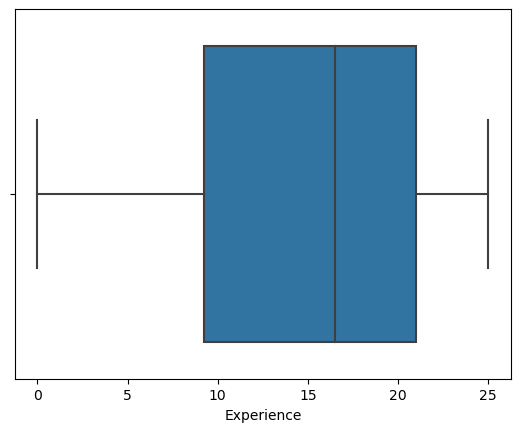

In [32]:
# Checking for the Outlier and then decide mean/median/mode approach
sns.boxplot(x="Experience" , data=dataset)

In [33]:
dataset["Age"] = dataset["Age"].fillna(dataset['Age'].mean())

In [34]:
# No outliers so we go with mean
dataset["Experience"] = dataset["Experience"].fillna(dataset['Experience'].mean())

In [35]:
dataset.isnull().sum()

Employee Id    0
First Name     0
Last Name      0
Department     0
Age            0
Experience     0
Salary         0
dtype: int64

In [36]:
# Filling Null values using SK learn Approach

In [37]:
from sklearn.impute import SimpleImputer

simple_impute = SimpleImputer(strategy='mean')
x[:,1:3] = simple_impute.fit_transform(x[:,1:3])

In [38]:
pd.DataFrame(x).isnull().sum()

0    0
1    0
2    0
dtype: int64

## Encoding 

In [39]:
dataset.head()

,Employee Id,First Name,Last Name,Department,Age,Experience,Salary
0,1,Joy,Bass,Sales and Marketing,28.0,3.0,32889
1,2,Sheila,Garza,Sales and Marketing,22.0,1.0,15944
2,3,John,Bryant,Customer Relations,22.0,1.0,40343
3,4,Christian,Farley,Customer Relations,22.0,1.0,19018
4,5,Colorado,Bowen,Accounting,27.0,0.0,24795


In [40]:
dataset2 = dataset.iloc[:,3:6]
dataset2

,Department,Age,Experience
0,Sales and Marketing,28.0,3.0
1,Sales and Marketing,22.0,1.0
2,Customer Relations,22.0,1.0
3,Customer Relations,22.0,1.0
4,Accounting,27.0,0.0
...,...,...,...
95,Sales and Marketing,47.0,22.0
96,Sales and Marketing,46.0,20.0
97,Customer Relations,44.0,18.0
98,Customer Relations,47.0,22.0


In [41]:
dataset2

,Department,Age,Experience
0,Sales and Marketing,28.0,3.0
1,Sales and Marketing,22.0,1.0
2,Customer Relations,22.0,1.0
3,Customer Relations,22.0,1.0
4,Accounting,27.0,0.0
...,...,...,...
95,Sales and Marketing,47.0,22.0
96,Sales and Marketing,46.0,20.0
97,Customer Relations,44.0,18.0
98,Customer Relations,47.0,22.0


In [42]:
# Manual Approach for Encoding
dataset2["Department"] = dataset2["Department"].astype("category")
dataset2['Department'] = dataset2["Department"].cat.codes # Convert into number
dataset3 = pd.get_dummies(dataset2 , columns=["Department"])

In [43]:
dataset2

,Department,Age,Experience
0,2,28.0,3.0
1,2,22.0,1.0
2,1,22.0,1.0
3,1,22.0,1.0
4,0,27.0,0.0
...,...,...,...
95,2,47.0,22.0
96,2,46.0,20.0
97,1,44.0,18.0
98,1,47.0,22.0


In [82]:
print(dataset2.to_string())

    Department       Age  Experience
0            2  28.00000    3.000000
1            2  22.00000    1.000000
2            1  22.00000    1.000000
3            1  22.00000    1.000000
4            0  27.00000    0.000000
5            0  26.00000    5.000000
6            1  24.00000    6.000000
7            1  29.00000    2.000000
8            2  29.00000    5.000000
9            1  30.00000    6.000000
10           0  26.00000    5.000000
11           2  26.00000    6.000000
12           0  24.00000    5.000000
13           0  22.00000    2.000000
14           2  25.00000    3.000000
15           0  25.00000   14.766667
16           1  22.00000   14.766667
17           0  25.00000   14.766667
18           0  27.00000   14.766667
19           2  25.00000   14.766667
20           2  22.00000   14.766667
21           2  22.00000   14.766667
22           2  24.00000   14.766667
23           2  27.00000   14.766667
24           2  22.00000   14.766667
25           2  33.00000   13.000000
2

In [45]:
dataset3.iloc[:,:]

,Age,Experience,Department_0,Department_1,Department_2
0,28.0,3.0,0,0,1
1,22.0,1.0,0,0,1
2,22.0,1.0,0,1,0
3,22.0,1.0,0,1,0
4,27.0,0.0,1,0,0
...,...,...,...,...,...
95,47.0,22.0,0,0,1
96,46.0,20.0,0,0,1
97,44.0,18.0,0,1,0
98,47.0,22.0,0,1,0


In [46]:
dataset2['Department'].value_counts()

2    49
0    27
1    24
Name: Department, dtype: int64

In [47]:
# Removing Dummy variable
dataset3 = dataset3.iloc[:,0:4]

In [48]:
dataset3

,Age,Experience,Department_0,Department_1
0,28.0,3.0,0,0
1,22.0,1.0,0,0
2,22.0,1.0,0,1
3,22.0,1.0,0,1
4,27.0,0.0,1,0
...,...,...,...,...
95,47.0,22.0,0,0
96,46.0,20.0,0,0
97,44.0,18.0,0,1
98,47.0,22.0,0,1


In [49]:
# Encoding Using SK learn library

In [50]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
encoding = LabelEncoder()
x[:,0] = encoding.fit_transform(x[:,0])

In [51]:
pd.DataFrame(x).head(10) # Converting into Data frame 

,0,1,2
0,2,28.0,3.0
1,2,22.0,1.0
2,1,22.0,1.0
3,1,22.0,1.0
4,0,27.0,0.0
5,0,26.0,5.0
6,1,24.0,6.0
7,1,29.0,2.0
8,2,29.0,5.0
9,1,30.0,6.0


In [52]:
# One Hot Encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer # column transfer-----> convert to Multiple Columns
columntransform = ColumnTransformer([('encoder', OneHotEncoder(),[0])],remainder='passthrough')

In [53]:
columntransform

ColumnTransformer(remainder='passthrough',
                  transformers=[('encoder', OneHotEncoder(), [0])])

In [54]:
x = columntransform.fit_transform(x)

In [55]:
x

array([[0.0, 0.0, 1.0, 28.0, 3.0],
       [0.0, 0.0, 1.0, 22.0, 1.0],
       [0.0, 1.0, 0.0, 22.0, 1.0],
       [0.0, 1.0, 0.0, 22.0, 1.0],
       [1.0, 0.0, 0.0, 27.0, 0.0],
       [1.0, 0.0, 0.0, 26.0, 5.0],
       [0.0, 1.0, 0.0, 24.0, 6.0],
       [0.0, 1.0, 0.0, 29.0, 2.0],
       [0.0, 0.0, 1.0, 29.0, 5.0],
       [0.0, 1.0, 0.0, 30.0, 6.0],
       [1.0, 0.0, 0.0, 26.0, 5.0],
       [0.0, 0.0, 1.0, 26.0, 6.0],
       [1.0, 0.0, 0.0, 24.0, 5.0],
       [1.0, 0.0, 0.0, 22.0, 2.0],
       [0.0, 0.0, 1.0, 25.0, 3.0],
       [1.0, 0.0, 0.0, 25.0, 14.766666666666667],
       [0.0, 1.0, 0.0, 22.0, 14.766666666666667],
       [1.0, 0.0, 0.0, 25.0, 14.766666666666667],
       [1.0, 0.0, 0.0, 27.0, 14.766666666666667],
       [0.0, 0.0, 1.0, 25.0, 14.766666666666667],
       [0.0, 0.0, 1.0, 22.0, 14.766666666666667],
       [0.0, 0.0, 1.0, 22.0, 14.766666666666667],
       [0.0, 0.0, 1.0, 24.0, 14.766666666666667],
       [0.0, 0.0, 1.0, 27.0, 14.766666666666667],
       [0.0, 0.0, 1.0, 22

In [56]:
pd.DataFrame(x).head(20)

,0,1,2,3,4
0,0.0,0.0,1.0,28.0,3.0
1,0.0,0.0,1.0,22.0,1.0
2,0.0,1.0,0.0,22.0,1.0
3,0.0,1.0,0.0,22.0,1.0
4,1.0,0.0,0.0,27.0,0.0
5,1.0,0.0,0.0,26.0,5.0
6,0.0,1.0,0.0,24.0,6.0
7,0.0,1.0,0.0,29.0,2.0
8,0.0,0.0,1.0,29.0,5.0
9,0.0,1.0,0.0,30.0,6.0


In [57]:
# Dummy variable (n-1)
x1 = x[:,1:]

In [58]:
pd.DataFrame(x1).head()

,0,1,2,3
0,0.0,1.0,28.0,3.0
1,0.0,1.0,22.0,1.0
2,1.0,0.0,22.0,1.0
3,1.0,0.0,22.0,1.0
4,0.0,0.0,27.0,0.0


# Feature Scaling

In [59]:
x_fs = pd.DataFrame(x)
x_fs

,0,1,2,3,4
0,0.0,0.0,1.0,28.0,3.0
1,0.0,0.0,1.0,22.0,1.0
2,0.0,1.0,0.0,22.0,1.0
3,0.0,1.0,0.0,22.0,1.0
4,1.0,0.0,0.0,27.0,0.0
...,...,...,...,...,...
95,0.0,0.0,1.0,47.0,22.0
96,0.0,0.0,1.0,46.0,20.0
97,0.0,1.0,0.0,44.0,18.0
98,0.0,1.0,0.0,47.0,22.0


In [60]:
# Standardization ---------------> prefferable because it also handles outliers
# Range----> -3 to +3
# formula


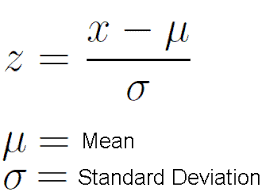

In [61]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_fs_std = sc_x.fit_transform(x_fs)
x_fs_std

array([[-0.60816364, -0.56195149,  1.02020406, -1.16485118, -1.81044925],
       [-0.60816364, -0.56195149,  1.02020406, -1.86547071, -2.11817433],
       [-0.60816364,  1.77951304, -0.98019606, -1.86547071, -2.11817433],
       [-0.60816364,  1.77951304, -0.98019606, -1.86547071, -2.11817433],
       [ 1.64429429, -0.56195149, -0.98019606, -1.2816211 , -2.27203688],
       [ 1.64429429, -0.56195149, -0.98019606, -1.39839102, -1.50272416],
       [-0.60816364,  1.77951304, -0.98019606, -1.63193087, -1.34886162],
       [-0.60816364,  1.77951304, -0.98019606, -1.04808125, -1.96431179],
       [-0.60816364, -0.56195149,  1.02020406, -1.04808125, -1.50272416],
       [-0.60816364,  1.77951304, -0.98019606, -0.93131133, -1.34886162],
       [ 1.64429429, -0.56195149, -0.98019606, -1.39839102, -1.50272416],
       [-0.60816364, -0.56195149,  1.02020406, -1.39839102, -1.34886162],
       [ 1.64429429, -0.56195149, -0.98019606, -1.63193087, -1.50272416],
       [ 1.64429429, -0.56195149, -0.9

In [62]:
# Normalization
# Range ---> 0 to 1


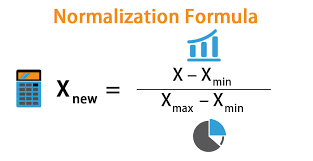

In [63]:
from sklearn.preprocessing import Normalizer
x_nr = Normalizer()
x_fs_norm = x_nr.fit_transform(x_fs)

In [64]:
x_fs_norm

array([[0.        , 0.        , 0.03548867, 0.99368282, 0.10646602],
       [0.        , 0.        , 0.04536092, 0.99794027, 0.04536092],
       [0.        , 0.04536092, 0.        , 0.99794027, 0.04536092],
       [0.        , 0.04536092, 0.        , 0.99794027, 0.04536092],
       [0.03701166, 0.        , 0.        , 0.99931483, 0.        ],
       [0.03774257, 0.        , 0.        , 0.98130676, 0.18871284],
       [0.        , 0.04038962, 0.        , 0.96935087, 0.24233772],
       [0.        , 0.03438071, 0.        , 0.99704054, 0.06876142],
       [0.        , 0.        , 0.03396178, 0.98489164, 0.1698089 ],
       [0.        , 0.03266858, 0.        , 0.98005728, 0.19601146],
       [0.03774257, 0.        , 0.        , 0.98130676, 0.18871284],
       [0.        , 0.        , 0.03745029, 0.97370765, 0.22470177],
       [0.04075696, 0.        , 0.        , 0.97816698, 0.20378479],
       [0.04522156, 0.        , 0.        , 0.99487439, 0.09044313],
       [0.        , 0.        , 0.

# Outlier Treatment 

In [65]:
cars = pd.read_excel('EDA Cars.xlsx')
cars.head()

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE
0,1,125301.24250,No,F,Bachelors,Blue Collar,45.703013,Commercial,17430.0,Sports Car,7.0,Texas,42420.0
1,2,50815.44531,No,M,High School,NaN,20.591628,Private,18930.0,Minivan,1.0,Texas,42420.0
2,3,62977.82416,NaN,F,Bachelors,Clerical,33.639949,Private,NaN,SUV,1.0,Texas,42420.0
3,4,77099.96624,No,F,NaN,Lawyer,15.415676,NaN,18300.0,Sports Car,11.0,Texas,42420.0
4,5,130794.57420,No,M,High School,NaN,NaN,Commercial,28340.0,Panel Truck,10.0,Texas,42420.0


In [66]:
cars.isnull().sum()

INDEX              0
INCOME            43
MARITAL STATUS    28
SEX                6
EDUCATION         44
JOB               46
TRAVEL TIME       41
USE               53
MILES CLOCKED     25
CAR TYPE          10
CAR AGE           20
CITY               6
POSTAL CODE        3
dtype: int64

<AxesSubplot:ylabel='INCOME'>

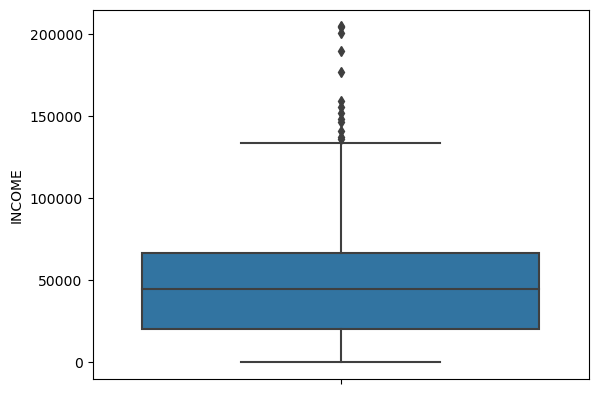

In [67]:
sns.boxplot(y='INCOME', data=cars)

In [68]:
cars['INCOME'] = cars['INCOME'].fillna(cars['INCOME'].median())

In [69]:
# handling outlier
# Either we can treat it using Outlier Robust Algorithms----> Local Outlier Factor  and Isolation Forest model
# IQR ----> Q3-Q1
# pos = Q3 + 1.5 * IQR
# Neg_out = Q1 -1.5* IQR

In [70]:
def remove_outlier(col):
    sorted(col)
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [71]:
lr_income, up_income = remove_outlier(cars['INCOME'])

In [72]:
print(lr_income)
print(up_income)

-38932.344305
125781.512695


In [73]:
cars['INCOME'] = np.where(cars['INCOME'] > up_income, up_income,cars['INCOME'])
cars['INCOME'] = np.where(cars['INCOME'] < lr_income, lr_income,cars['INCOME'])

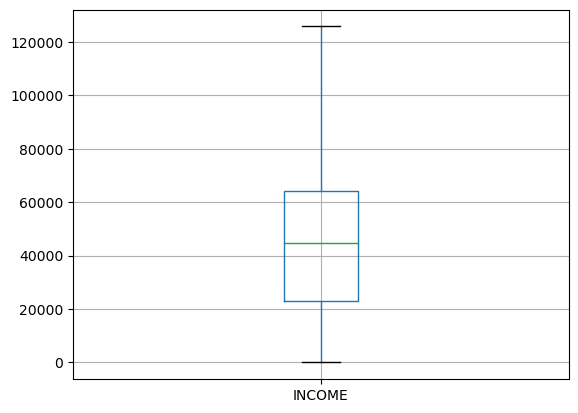

In [74]:
# verticle boxplot
cars.boxplot(column=['INCOME'])
plt.show()

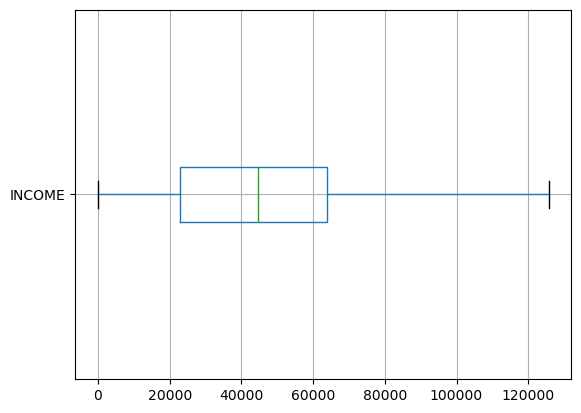

In [75]:
# Horizontal boxplot
cars.boxplot(column=['INCOME'], vert=False)
plt.show()

#  Imbalanced data

In [76]:
credit = pd.read_csv("creditcard_fraud_data.csv")
credit

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [77]:
# Checking for Imbalanced data set
credit['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [83]:
# 2*Minority >= Majority

In [84]:
!pip install imblearn


[notice] A new release of pip available: 22.3 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [85]:
# Over sampling 
# Under sampling

In [86]:
# split the data before balancing the data

In [87]:
x = credit.iloc[:,:-1]

In [88]:
y = credit.iloc[:,-1]

In [89]:
x

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [90]:
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
x_train ,x_test , y_train , y_test = train_test_split(x , y , test_size=0.25 , random_state=101)

In [93]:
# Under Sampling
from imblearn.under_sampling import RandomUnderSampler
under = RandomUnderSampler()
x_under , y_under = under.fit_resample(x,y)

In [94]:
print(x_under.shape)
print(y_under.shape)

(984, 30)
(984,)


In [95]:
# Over Sampling
from imblearn.over_sampling import RandomOverSampler
over = RandomOverSampler()
x_over , y_over = over.fit_resample(x,y)

In [96]:
print(x_over.shape)
print(y_over.shape)

(568630, 30)
(568630,)


In [97]:
# SMOTE- Synthetic Minority Oversampling Technique 
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote , y_smote = smote.fit_resample(x ,y)


In [98]:
print(x_smote.shape)
print(y_smote.shape)

(568630, 30)
(568630,)


In [99]:
# NearMiss---> Under sampling technique
from imblearn.under_sampling import NearMiss
nm = NearMiss()
x_nm , y_nm = nm.fit_resample(x,y)


In [100]:
print(x_nm.shape)
print(y_nm.shape)

(984, 30)
(984,)


In [101]:
# EDA - Univariate, Bi- variate and Multivariate  Analysis

# Regression Plot

In [102]:
dataset.head()

,Employee Id,First Name,Last Name,Department,Age,Experience,Salary
0,1,Joy,Bass,Sales and Marketing,28.0,3.0,32889
1,2,Sheila,Garza,Sales and Marketing,22.0,1.0,15944
2,3,John,Bryant,Customer Relations,22.0,1.0,40343
3,4,Christian,Farley,Customer Relations,22.0,1.0,19018
4,5,Colorado,Bowen,Accounting,27.0,0.0,24795


In [103]:
# Univariate
# - Measure of Central Tendency---- Mean Meadian Mode
# - Measure of Dispersion------- Q1 ,Q2 , Q3, Q4 , IQR , Outliers, Variance, Standard deviations


In [104]:
# Bivariate
# Heatmap ,covariance , Types of Distribution

In [105]:
# Multivariate----> More than two variables
# Pairplot , Heatmap


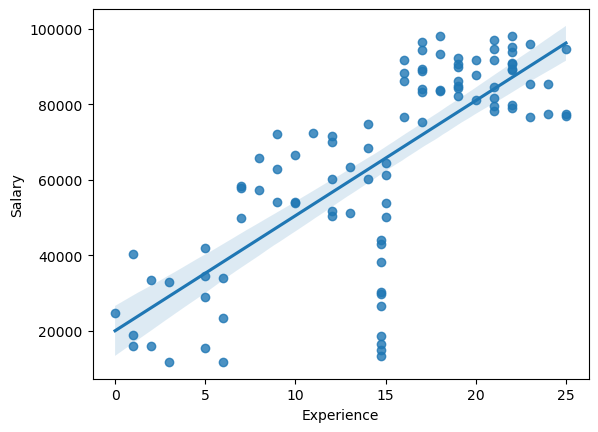

In [106]:
# regression plot
sns.regplot(y = "Salary" , x = "Experience" , data = dataset)
plt.show()

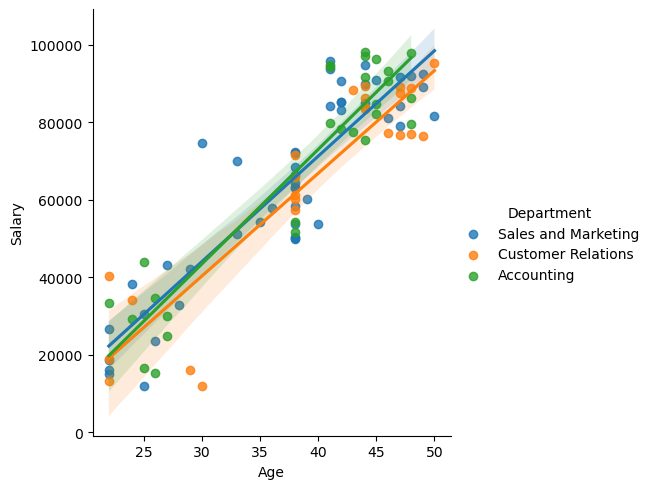

In [107]:
#Linear model plot
sns.lmplot(x="Age" , y = "Salary" , data=dataset , hue="Department")

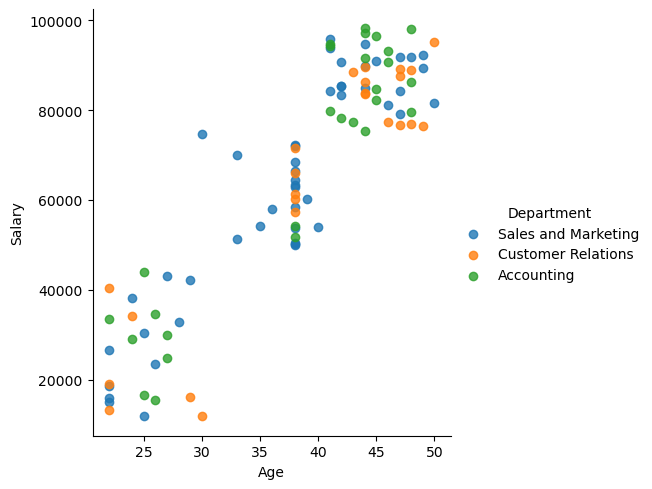

In [109]:
sns.lmplot(x="Age" , y = "Salary" , data=dataset , hue="Department" , fit_reg=False) # fit_reg= False----> No Linear Line

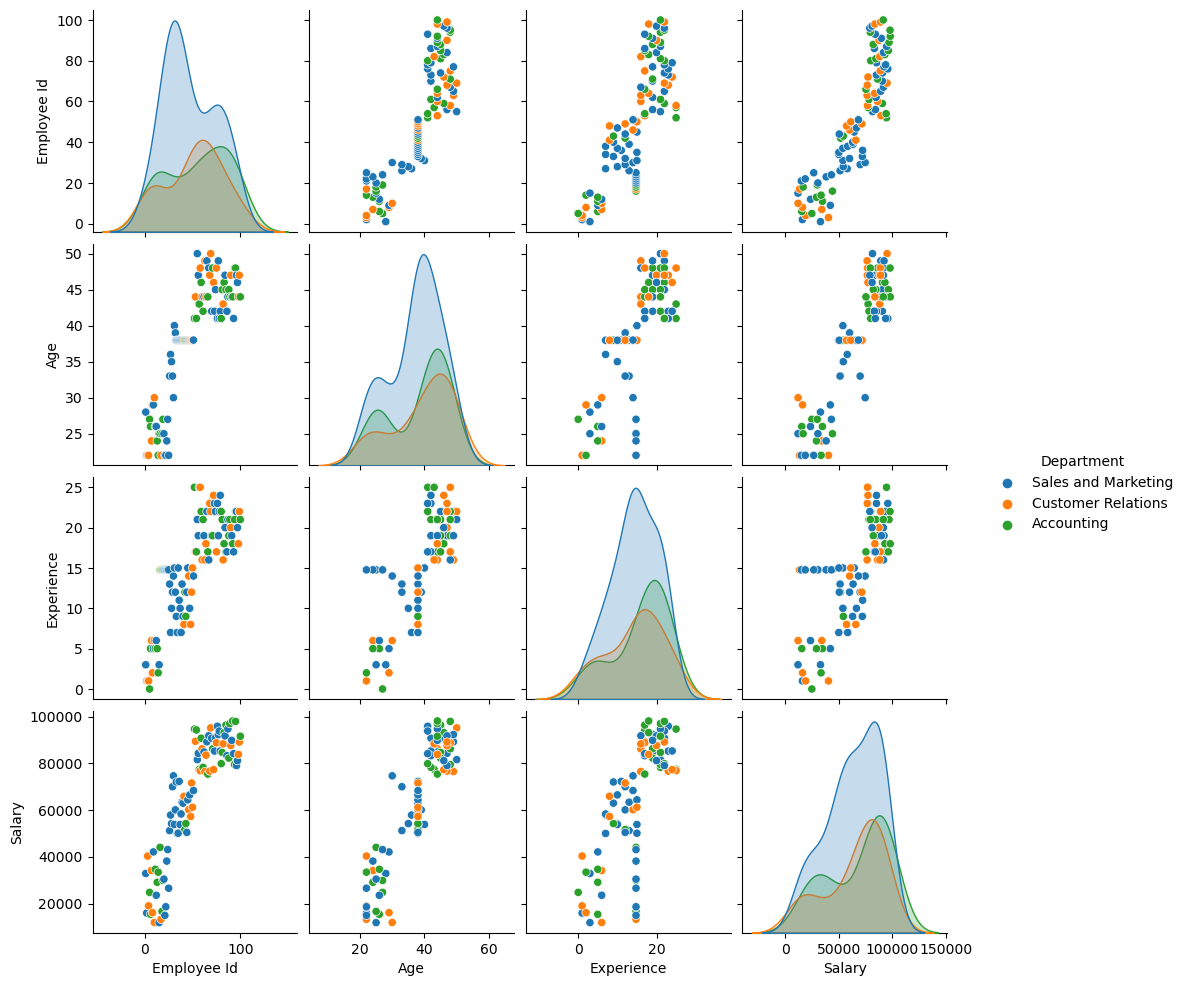

In [110]:
sns.pairplot(dataset, hue="Department")

<AxesSubplot:>

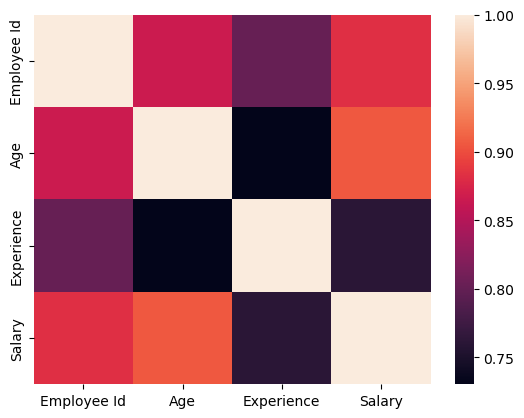

In [111]:
sns.heatmap(dataset.corr())

<AxesSubplot:>

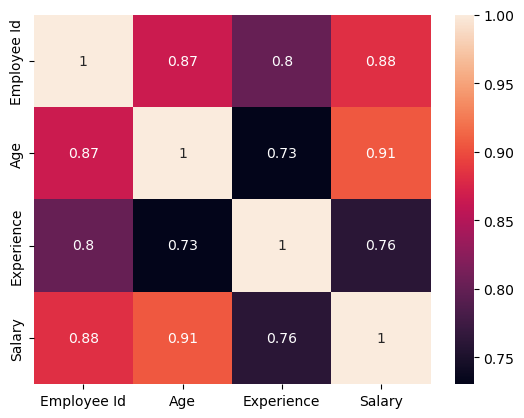

In [112]:
sns.heatmap(dataset.corr(), annot=True)

In [113]:
iris = sns.load_dataset("iris")

In [114]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [115]:
# 2-D Scatter plot

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

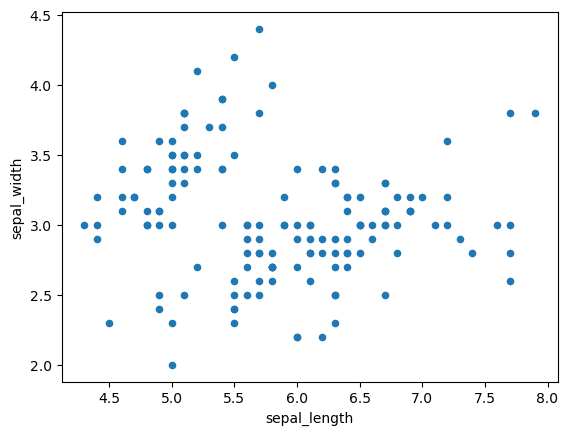

In [116]:
iris.plot(kind="scatter", x='sepal_length', y='sepal_width')

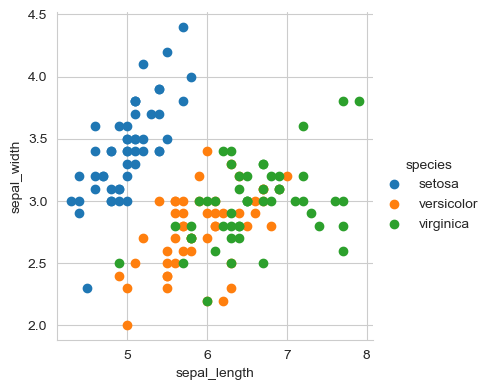

In [117]:
sns.set_style("whitegrid")
sns.FacetGrid(iris, hue='species' ,size=4).map(plt.scatter, "sepal_length" ,"sepal_width").add_legend()

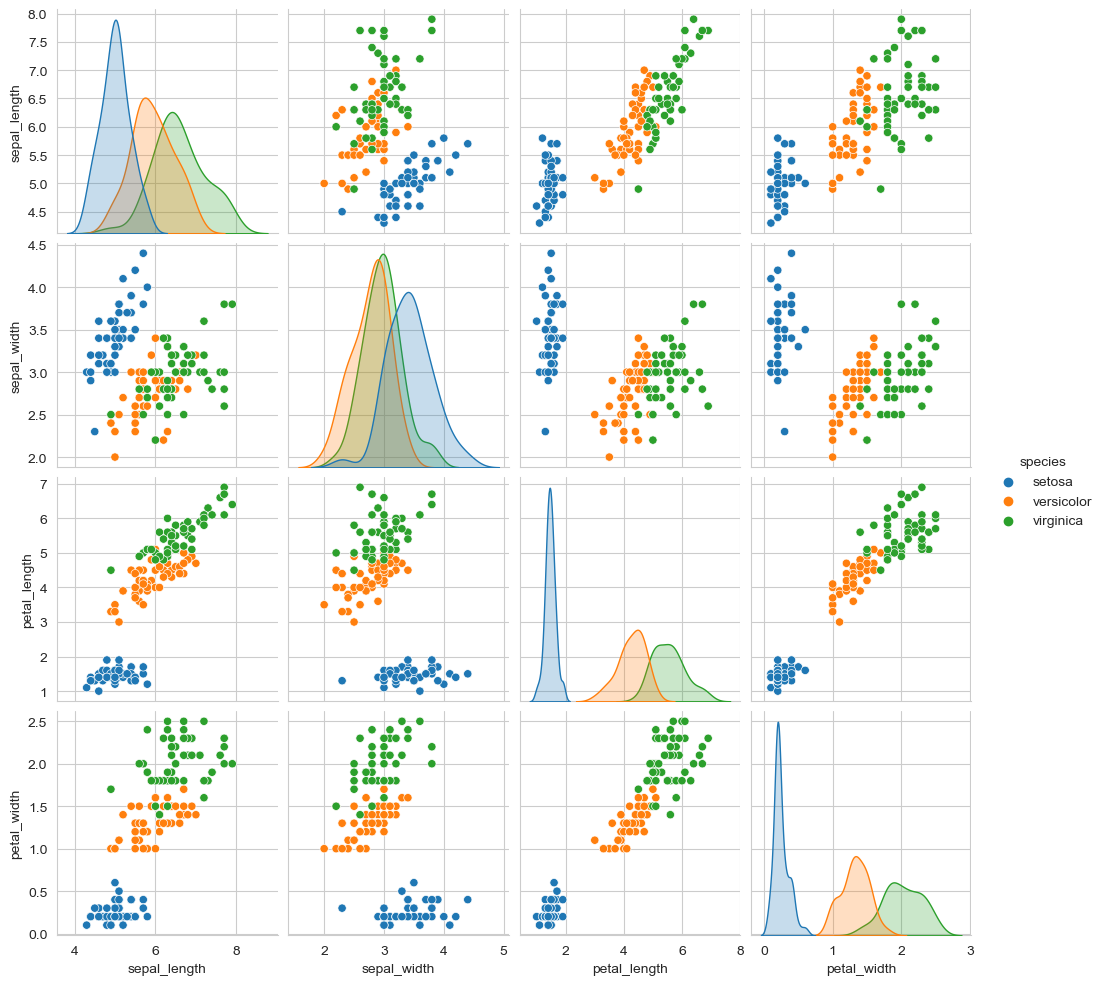

In [118]:
sns.set_style("whitegrid")
sns.pairplot(iris, hue='species')

In [119]:
# Histogram , PDF , CDF

In [120]:
iris['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [121]:
iris_setosa = iris.loc[iris['species']=='setosa']
iris_setosa = iris.loc[iris['species']=='virginica']
iris_setosa = iris.loc[iris['species']=='versicolor']

iris_virginica = iris.loc[iris['species']=='setosa']
iris_virginica = iris.loc[iris['species']=='virginica']
iris_virginica = iris.loc[iris['species']=='versicolor']

iris_versicolor = iris.loc[iris['species']=='setosa']
iris_versicolor = iris.loc[iris['species']=='virginica']
iris_versicolor = iris.loc[iris['species']=='versicolor']



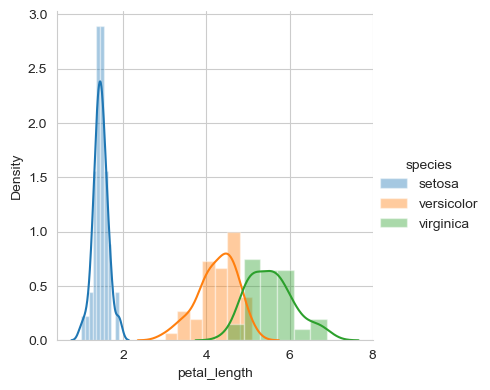

In [122]:
sns.FacetGrid(iris , hue="species" , size=4).map(sns.distplot , 'petal_length').add_legend()